### Лабораторна робота #3, Людомирський Юрій, КА-96, v23
#### Загальна постановка задачі.
1. Представити початковi данi графiчно.
---
2. Побудувати модель кластеризацiї згiдно з варiантом.
---
3. Виконати кластеризацiю даних на основi моделi.
---
4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.
---
5. Розрахувати додатковi результати кластеризацiї (згiдно з варiантом).
---
6. Побудувати декiлька альтернативних моделей: шляхом змiни значень параметрiв основної моделi, використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зробити, задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть кластерiв -- параметр.
---
7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics (тiльки метрики згiдно з варiантом).
---
8. Виконати аналiз результатiв кластеризацiї одним з неформальних методiв (тiльки методом згiдно з варiантом).
---
9. Зробити висновки про якiсть роботи моделей на дослiджених даних. Дослiдити рiзнi значення параметрiв основної моделi, рiзнi функцiї вiдстанi та рiзну кiлькiсть кластерiв в алгоритмах, де кiлькiсть кластерiв слугує параметром.
---
10. Оцiнити результати кластеризацiї на основi метрик якостi та на основi неформальних методiв. У кожному варiантi задано два набори даних. Для кожного набору даних обрати найкращу модель.
---
#### Завдання згідно варіанту.
1. Алгоритм Spectral clustering.
---
2. Метрики якостi: Estimated number of clusters, Adjusted Rand Index, Silhouette Coefficient, Davies-Bouldin index.
---
3. Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?

#### Початкові дані.
1. sklearn.datasets.load_digits
2. sklearn.datasets.samples_generator.make_circles

### Метрики кластеризації
Adjusted Rand Index (ARI) — це метрика, яка вимірює подібність двох лейблів (справжніх та спрогнозованих), ігноруючи перестановки та нормалізацію. Значення ARI лежать у межах від -1 до 1, де 1 це найкраще значення, що характеризує ідеальний алгоритм.  

Silhouette Coefficient — оцінка, що характеризує відокремленість кластерів. Лежить у межах від -1 до 1, де -1 відповідає за неправильну кластеризацію, +1 за ідеальну кластеризацію. Оцінки, близькі до нуля, вказують на перекривання (overlapping) кластерів.

Davies-Bouldin index — Оцінка визначається як середня міра подібності кожного кластера з його найбільш схожим кластером, де подібність — це відношення відстаней всередині кластера до відстаней між кластерами. Таким чином, кластери, які розташовані далі один від одного і менш розсіяні, призведуть до кращого результату.

Мінімальне значення дорівнює нулю, чим значення метрики нижче, тим кластеризація краща. 

### Imports

In [706]:
from sklearn.datasets import load_digits, make_circles

from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_samples, silhouette_score, davies_bouldin_score

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import matplotlib.cm as cm
plt.rcParams["figure.figsize"] = (11, 7)

import seaborn as sns
import pandas as pd
import numpy as np
import random

import warnings
warnings.filterwarnings("ignore")

### Метод для PCA-візуалізації

In [707]:
def visualisationPCA(X_PCA, y_PCA):
    PCA_model = PCA(n_components=2)
    PCA_model.fit(X_PCA)

    X_2D = PCA_model.transform(X_PCA)
    X_PCA = pd.DataFrame([X_2D[:, 0], X_2D[:, 1]]).T
    y_PCA = pd.DataFrame(y_PCA)

    df = pd.concat([X_PCA, y_PCA], axis=1)
    df.columns = ['PCA1', 'PCA2', 'y']

    sns.lmplot("PCA1", "PCA2", hue="y", data=df, fit_reg=False)

 ### Метод для обчислення та візуалізації метрик

In [708]:
def scoresAnalyzer(data, labels, affinity, eigen_solver=None, n_neighbors=None):
    clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    A_list, S_list, DB_list = [], [], []

    for n_clusters in clusters_range:
        clusterer = SpectralClustering(n_clusters=n_clusters, affinity=affinity, eigen_solver=eigen_solver, n_neighbors=n_neighbors)
        preds = clusterer.fit_predict(data)

        A_score  = adjusted_rand_score(labels, preds)
        S_score  = silhouette_score(data, preds)
        DB_score = davies_bouldin_score(data, preds)

        A_list.append(A_score)
        S_list.append(S_score)
        DB_list.append(DB_score)

        print("For {} cl,\tARI is {}, \t S_score is {}, \t DB_score is {}".format(n_clusters, round(A_score, 7), round(S_score, 7), round(DB_score, 7)))
        
    axes = plt.axes()
    axes.set_title("scores comparison")
    axes.set_xlabel("clusters range")
    axes.set_ylabel("values")

    axes.grid()
    axes.plot(clusters_range, A_list, 'o-', color="yellow", label="adjusted rand score")
    axes.plot(clusters_range, S_list, 'o-', color="black", label="silhouette score")
    axes.plot(clusters_range, DB_list, 'o-', color="darkorange", label="davies-bouldin score")
    axes.legend(loc="best")

    plt.show()

### Метод для перевірки стабільності

In [709]:
def stabilityAnalyzer(data, labels, n_clusters, affinity, eigen_solver=None, n_neighbors=None):
    A_list, S_list, DB_list = [], [], []
    rrange = [41, 43, 32, 0, 34, 14, 65, 2, 5, 7]

    for i in range(10):
        clusterer = SpectralClustering(n_clusters=n_clusters, affinity=affinity, eigen_solver=eigen_solver, n_neighbors=n_neighbors, random_state=rrange[i])
        preds = clusterer.fit_predict(data)

        A_score  = adjusted_rand_score(labels, preds)
        S_score  = silhouette_score(data, preds)
        DB_score = davies_bouldin_score(data, preds)

        A_list.append(A_score)
        S_list.append(S_score)
        DB_list.append(DB_score)

        print("For run {},\tARI is {}, \t S_score is {}, \t DB_score is {}".format((i+1), round(A_score, 7), round(S_score, 7), round(DB_score, 7)))
        
    axes = plt.axes()
    axes.set_title("scores comparison")
    axes.set_xlabel("clusters range")
    axes.set_ylabel("values")

    axes.grid()
    axes.plot(range(10), A_list, 'o-', color="yellow", label="adjusted rand score")
    axes.plot(range(10), S_list, 'o-', color="black", label="silhouette score")
    axes.plot(range(10), DB_list, 'o-', color="darkorange", label="davies-bouldin score")
    axes.legend(loc="best")

    plt.show()

### Завантаження та графічне зображення датасету digits

In [710]:
digits = load_digits(return_X_y=False)
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"digits: {n_digits}; samples: {n_samples}; features {n_features}")

digits: 10; samples: 1797; features 64


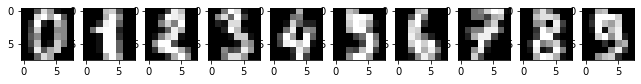

In [711]:
fig, axes = plt.subplots(1, 10)
for ax, digit in zip(axes.flat, digits.data[:10]):
    ax.imshow(digit.reshape(8, 8), cmap="gray")

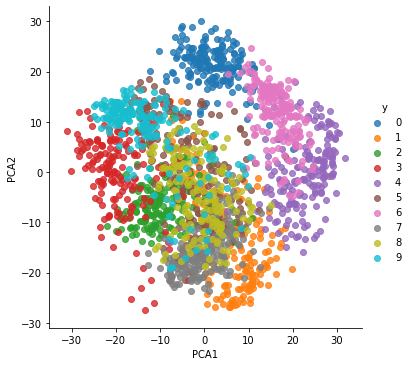

In [712]:
visualisationPCA(data, labels)

### Примітивна модель спектральної кластеризації (з параметрами за замовченням)
Задано лише к-cть кластерів та параметр affinity для побудови матриці.

In [713]:
model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors').fit(digits.data)

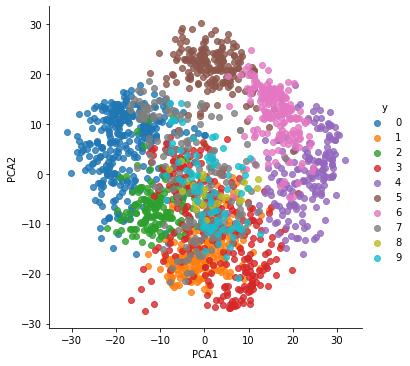

In [714]:
visualisationPCA(data, model.labels_)

In [715]:
adjusted_rand_score(labels, model.labels_)

0.7564608880380487

In [716]:
digit_sum = 0
for i in range(10):
    digit_sum += list(model.labels_).count(i)
    print("count of clusterized", i, "is", ( list(model.labels_).count(i)))
digit_sum

count of clusterized 0 is 324
count of clusterized 1 is 194
count of clusterized 2 is 167
count of clusterized 3 is 289
count of clusterized 4 is 177
count of clusterized 5 is 178
count of clusterized 6 is 181
count of clusterized 7 is 180
count of clusterized 8 is 27
count of clusterized 9 is 80


1797

### Побудова моделей з різними параметрами та обчислення метрик

For 2 cl,	ARI is 0.0469282, 	 S_score is 0.0547968, 	 DB_score is 1.8371819
For 3 cl,	ARI is 0.1080651, 	 S_score is 0.0717502, 	 DB_score is 1.9459058
For 4 cl,	ARI is 0.1094845, 	 S_score is 0.0582324, 	 DB_score is 1.7400127
For 5 cl,	ARI is 0.1860932, 	 S_score is 0.0889285, 	 DB_score is 1.7164019
For 6 cl,	ARI is 0.276402, 	 S_score is 0.0997502, 	 DB_score is 1.8854145
For 7 cl,	ARI is 0.4031799, 	 S_score is 0.1200496, 	 DB_score is 1.9486646
For 8 cl,	ARI is 0.5477334, 	 S_score is 0.1415002, 	 DB_score is 1.9473049
For 9 cl,	ARI is 0.7437013, 	 S_score is 0.1689365, 	 DB_score is 1.9104979
For 10 cl,	ARI is 0.7564609, 	 S_score is 0.1827286, 	 DB_score is 1.7990074
For 11 cl,	ARI is 0.8362043, 	 S_score is 0.1747378, 	 DB_score is 1.8886741
For 12 cl,	ARI is 0.8102003, 	 S_score is 0.1772948, 	 DB_score is 1.8551888
For 13 cl,	ARI is 0.8580866, 	 S_score is 0.1798257, 	 DB_score is 1.8549466
For 14 cl,	ARI is 0.850888, 	 S_score is 0.1759589, 	 DB_score is 1.8038624
For 15 cl

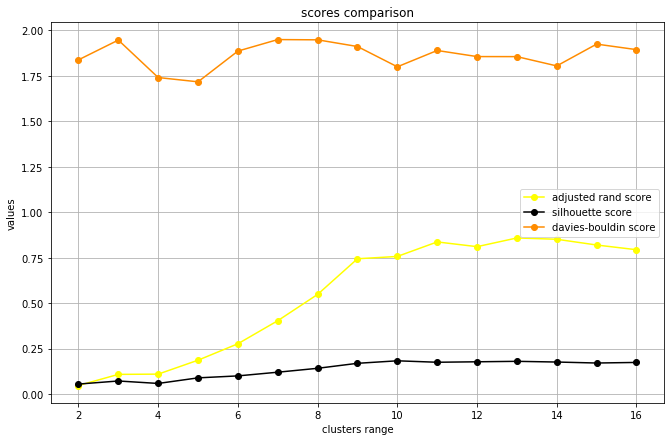

In [717]:
scoresAnalyzer(data, labels, 'nearest_neighbors', eigen_solver='arpack', n_neighbors=10)

For 2 cl,	ARI is 0.0469282, 	 S_score is 0.0547968, 	 DB_score is 1.8371819
For 3 cl,	ARI is 0.0484445, 	 S_score is 0.028096, 	 DB_score is 1.7623193
For 4 cl,	ARI is 0.1094845, 	 S_score is 0.0582324, 	 DB_score is 1.7400127
For 5 cl,	ARI is 0.2702623, 	 S_score is 0.0891544, 	 DB_score is 2.0726027
For 6 cl,	ARI is 0.2764981, 	 S_score is 0.0995494, 	 DB_score is 1.8883244
For 7 cl,	ARI is 0.4019386, 	 S_score is 0.1197132, 	 DB_score is 1.946563
For 8 cl,	ARI is 0.5502266, 	 S_score is 0.141029, 	 DB_score is 1.9502628
For 9 cl,	ARI is 0.7491217, 	 S_score is 0.1685568, 	 DB_score is 1.9126539
For 10 cl,	ARI is 0.7565242, 	 S_score is 0.1815967, 	 DB_score is 1.8127808
For 11 cl,	ARI is 0.8397854, 	 S_score is 0.1745237, 	 DB_score is 1.887502
For 12 cl,	ARI is 0.8293588, 	 S_score is 0.1675498, 	 DB_score is 1.8412846
For 13 cl,	ARI is 0.8009453, 	 S_score is 0.1720993, 	 DB_score is 1.8147911
For 14 cl,	ARI is 0.859939, 	 S_score is 0.1767714, 	 DB_score is 1.7988686
For 15 cl,	A

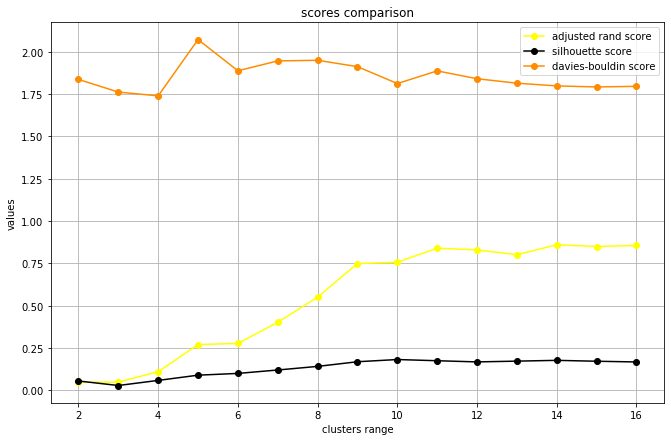

In [718]:
scoresAnalyzer(data, labels, 'nearest_neighbors', eigen_solver='lobpcg', n_neighbors=8)

For 2 cl,	ARI is 0.0960256, 	 S_score is 0.1021124, 	 DB_score is 2.9237875
For 3 cl,	ARI is 0.2061438, 	 S_score is 0.1192231, 	 DB_score is 2.4959942
For 4 cl,	ARI is 0.2496888, 	 S_score is 0.1264876, 	 DB_score is 2.2701899
For 5 cl,	ARI is 0.3318237, 	 S_score is 0.1329233, 	 DB_score is 2.1412091
For 6 cl,	ARI is 0.4120024, 	 S_score is 0.1396423, 	 DB_score is 2.0360535
For 7 cl,	ARI is 0.494544, 	 S_score is 0.1580426, 	 DB_score is 1.8714486
For 8 cl,	ARI is 0.5000903, 	 S_score is 0.1606322, 	 DB_score is 1.9168026
For 9 cl,	ARI is 0.5732542, 	 S_score is 0.1748643, 	 DB_score is 1.8841548
For 10 cl,	ARI is 0.6290207, 	 S_score is 0.1674654, 	 DB_score is 1.9568948
For 11 cl,	ARI is 0.6777984, 	 S_score is 0.1703488, 	 DB_score is 2.0057857
For 12 cl,	ARI is 0.6749663, 	 S_score is 0.1682203, 	 DB_score is 1.9910975
For 13 cl,	ARI is 0.6846629, 	 S_score is 0.1701141, 	 DB_score is 1.9212866
For 14 cl,	ARI is 0.6534928, 	 S_score is 0.1718119, 	 DB_score is 1.9050148
For 15 c

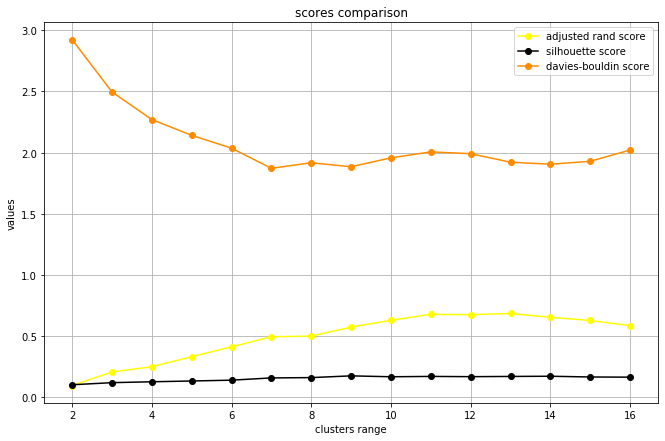

In [719]:
scoresAnalyzer(data, labels, 'linear', eigen_solver='amg')

For 2 cl,	ARI is 2e-07, 	 S_score is -0.0188218, 	 DB_score is 7.6154594
For 3 cl,	ARI is 5.38e-05, 	 S_score is -0.0206544, 	 DB_score is 7.8728922
For 4 cl,	ARI is -4.16e-05, 	 S_score is -0.0234, 	 DB_score is 13.0300985
For 5 cl,	ARI is 2.69e-05, 	 S_score is -0.0656902, 	 DB_score is 5.9259152
For 6 cl,	ARI is 0.0010016, 	 S_score is -0.0608009, 	 DB_score is 19.5683028
For 7 cl,	ARI is -2.72e-05, 	 S_score is -0.0834073, 	 DB_score is 6.9387271
For 8 cl,	ARI is 0.0003154, 	 S_score is -0.0886251, 	 DB_score is 15.0192148
For 9 cl,	ARI is 9.96e-05, 	 S_score is -0.096369, 	 DB_score is 11.5749975
For 10 cl,	ARI is 0.0004955, 	 S_score is -0.114565, 	 DB_score is 12.9138316
For 11 cl,	ARI is 4.57e-05, 	 S_score is -0.1551512, 	 DB_score is 9.8183958
For 12 cl,	ARI is -0.0003453, 	 S_score is -0.2167617, 	 DB_score is 11.8317495
For 13 cl,	ARI is -0.0003382, 	 S_score is -0.1850513, 	 DB_score is 12.7106942
For 14 cl,	ARI is -0.0001284, 	 S_score is -0.1653266, 	 DB_score is 10.0786

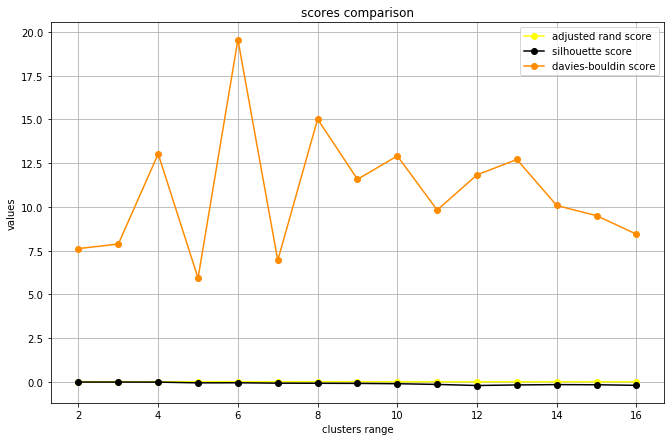

In [720]:
scoresAnalyzer(data, labels, 'sigmoid', eigen_solver='arpack')

For 2 cl,	ARI is 0.0995857, 	 S_score is 0.1037504, 	 DB_score is 2.8788518
For 3 cl,	ARI is 0.1997949, 	 S_score is 0.1159272, 	 DB_score is 2.4313176
For 4 cl,	ARI is 0.251609, 	 S_score is 0.126238, 	 DB_score is 2.2685444
For 5 cl,	ARI is 0.3395266, 	 S_score is 0.1341756, 	 DB_score is 2.1382418
For 6 cl,	ARI is 0.4066918, 	 S_score is 0.1369688, 	 DB_score is 1.9969446
For 7 cl,	ARI is 0.5024741, 	 S_score is 0.1607419, 	 DB_score is 1.8531697
For 8 cl,	ARI is 0.5386008, 	 S_score is 0.1671142, 	 DB_score is 1.8646323
For 9 cl,	ARI is 0.555914, 	 S_score is 0.1812606, 	 DB_score is 1.7914314
For 10 cl,	ARI is 0.6384127, 	 S_score is 0.1734506, 	 DB_score is 1.9267097
For 11 cl,	ARI is 0.6365224, 	 S_score is 0.1747236, 	 DB_score is 1.8859148
For 12 cl,	ARI is 0.7196112, 	 S_score is 0.174826, 	 DB_score is 1.9566619
For 13 cl,	ARI is 0.6881548, 	 S_score is 0.1749841, 	 DB_score is 1.9095954
For 14 cl,	ARI is 0.6383208, 	 S_score is 0.1754177, 	 DB_score is 1.8723876
For 15 cl,	

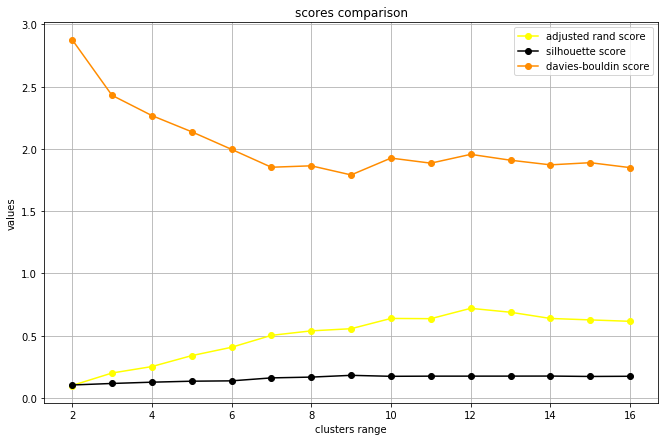

In [721]:
scoresAnalyzer(data, labels, 'polynomial', eigen_solver='arpack')

### Вилучення об'єктів та перевірка стабільності розбиття

In [722]:
model = SpectralClustering(n_clusters=16, affinity='nearest_neighbors', eigen_solver='lobpcg', n_neighbors=8).fit(digits.data)

In [723]:
mask = model.labels_ > 10
dataDF = pd.DataFrame(digits.data)

In [724]:
indexes = []
for i in range(len(mask)):
    if mask[i] == True:
        indexes.append(i)
        
dataDF = dataDF.drop(index=indexes)

data_fixed = np.array(dataDF)
labels_fixed = np.delete(labels, indexes)

In [725]:
model_fixed = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', eigen_solver='lobpcg', n_neighbors=8).fit(data_fixed)

In [726]:
adjusted_rand_score(labels_fixed, model_fixed.labels_)

0.8604677709264225

For 2 cl,	ARI is 0.0562606, 	 S_score is 0.0669967, 	 DB_score is 1.8153647
For 3 cl,	ARI is 0.1347945, 	 S_score is 0.0890614, 	 DB_score is 1.9197293
For 4 cl,	ARI is 0.213495, 	 S_score is 0.1220885, 	 DB_score is 1.7485078
For 5 cl,	ARI is 0.2166097, 	 S_score is 0.1115338, 	 DB_score is 1.6301261
For 6 cl,	ARI is 0.3298179, 	 S_score is 0.1198007, 	 DB_score is 1.8927289
For 7 cl,	ARI is 0.4765625, 	 S_score is 0.1394597, 	 DB_score is 1.9663235
For 8 cl,	ARI is 0.5588614, 	 S_score is 0.1593228, 	 DB_score is 1.858358
For 9 cl,	ARI is 0.764806, 	 S_score is 0.1936405, 	 DB_score is 1.7748588
For 10 cl,	ARI is 0.8563067, 	 S_score is 0.1868335, 	 DB_score is 1.8753459
For 11 cl,	ARI is 0.9219154, 	 S_score is 0.1929267, 	 DB_score is 1.8524817
For 12 cl,	ARI is 0.8957972, 	 S_score is 0.1896746, 	 DB_score is 1.8615972
For 13 cl,	ARI is 0.8650468, 	 S_score is 0.1929294, 	 DB_score is 1.8280887
For 14 cl,	ARI is 0.8335219, 	 S_score is 0.1912138, 	 DB_score is 1.8072739
For 15 cl,

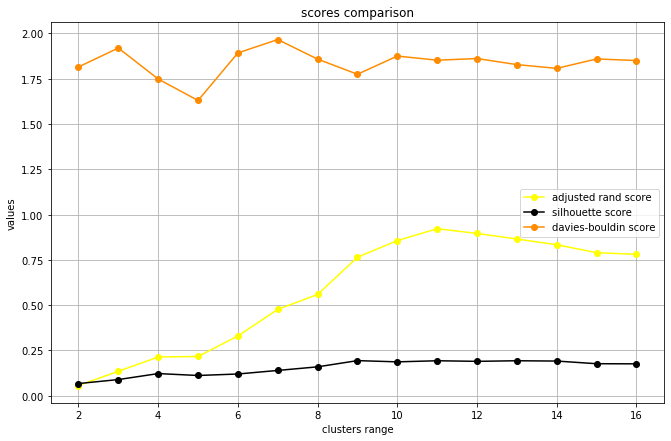

In [727]:
scoresAnalyzer(data_fixed, labels_fixed, 'nearest_neighbors', eigen_solver='lobpcg', n_neighbors=10)

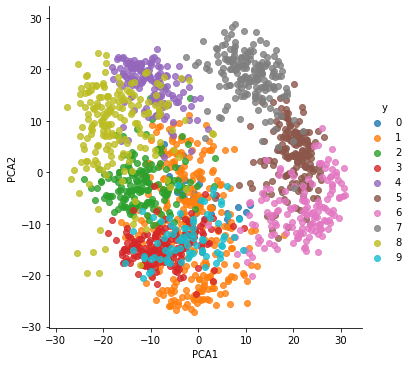

In [728]:
visualisationPCA(data_fixed, model_fixed.labels_)

For run 1,	ARI is 0.8563067, 	 S_score is 0.1868335, 	 DB_score is 1.8753459
For run 2,	ARI is 0.8563067, 	 S_score is 0.1868335, 	 DB_score is 1.8753459
For run 3,	ARI is 0.8563067, 	 S_score is 0.1868335, 	 DB_score is 1.8753459
For run 4,	ARI is 0.8563067, 	 S_score is 0.1868335, 	 DB_score is 1.8753459
For run 5,	ARI is 0.8563067, 	 S_score is 0.1868335, 	 DB_score is 1.8753459
For run 6,	ARI is 0.8563067, 	 S_score is 0.1868335, 	 DB_score is 1.8753459
For run 7,	ARI is 0.8563067, 	 S_score is 0.1868335, 	 DB_score is 1.8753459
For run 8,	ARI is 0.8563067, 	 S_score is 0.1868335, 	 DB_score is 1.8753459
For run 9,	ARI is 0.8563067, 	 S_score is 0.1868335, 	 DB_score is 1.8753459
For run 10,	ARI is 0.8563067, 	 S_score is 0.1868335, 	 DB_score is 1.8753459


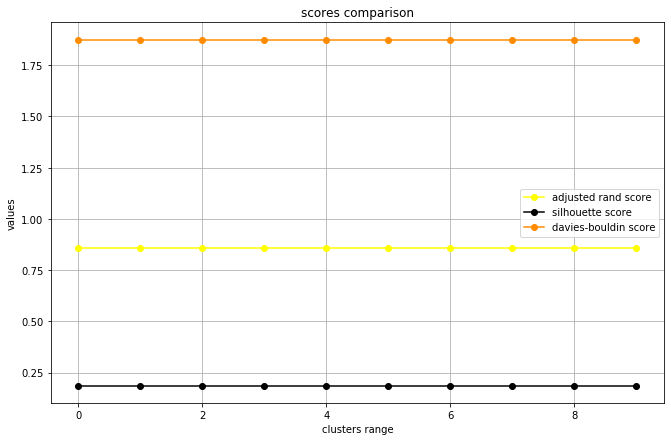

In [729]:
stabilityAnalyzer(data_fixed, labels_fixed, 10, 'nearest_neighbors', eigen_solver='lobpcg', n_neighbors=10)

### Генерація та графічне зображення датасету circles

In [730]:
X, y = make_circles(500, factor=.1, noise=.1)

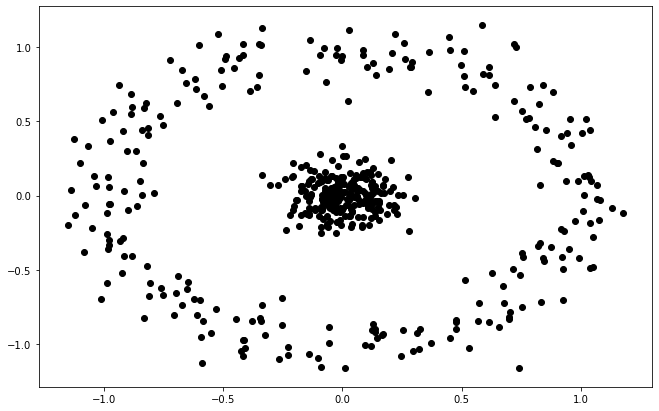

In [731]:
plt.scatter(X[:,0], X[:,1], color="black")
plt.show()

### Примітивна модель спектральної кластеризації (з параметрами за замовченням)
Задано лише к-cть кластерів (графічно логічно поставити 2) та параметр affinity для побудови матриці.

In [732]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
preds = model.fit_predict(X)

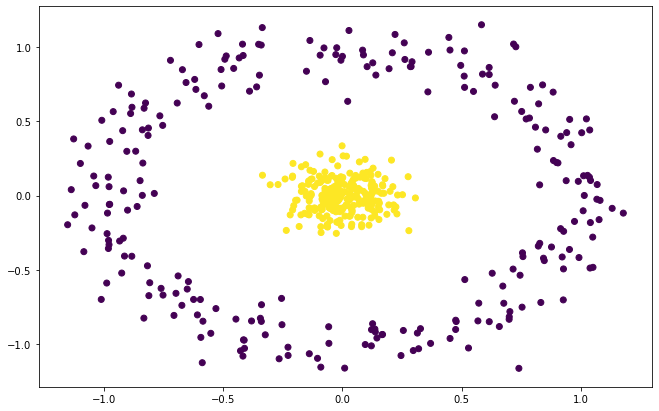

In [733]:
plt.scatter(X[:, 0], X[:, 1], c=preds)
plt.show()

For 2 cl,	ARI is 1.0, 	 S_score is 0.2892726, 	 DB_score is 160.9260822
For 3 cl,	ARI is 0.750977, 	 S_score is 0.4227211, 	 DB_score is 1.4336632
For 4 cl,	ARI is 0.6677696, 	 S_score is 0.5393648, 	 DB_score is 0.8386949
For 5 cl,	ARI is 0.6241645, 	 S_score is 0.597376, 	 DB_score is 0.6216669
For 6 cl,	ARI is 0.6061166, 	 S_score is 0.5959751, 	 DB_score is 0.5907202
For 7 cl,	ARI is 0.3573592, 	 S_score is 0.3676276, 	 DB_score is 0.7768854
For 8 cl,	ARI is 0.274921, 	 S_score is 0.3742494, 	 DB_score is 0.7231836
For 9 cl,	ARI is 0.2548861, 	 S_score is 0.3983689, 	 DB_score is 0.7015942
For 10 cl,	ARI is 0.2427132, 	 S_score is 0.4008997, 	 DB_score is 0.6862597
For 11 cl,	ARI is 0.2013016, 	 S_score is 0.3568479, 	 DB_score is 0.7427943
For 12 cl,	ARI is 0.1933241, 	 S_score is 0.3492396, 	 DB_score is 0.7348157
For 13 cl,	ARI is 0.1623444, 	 S_score is 0.3779073, 	 DB_score is 0.7149594
For 14 cl,	ARI is 0.1552021, 	 S_score is 0.3824835, 	 DB_score is 0.703978
For 15 cl,	ARI 

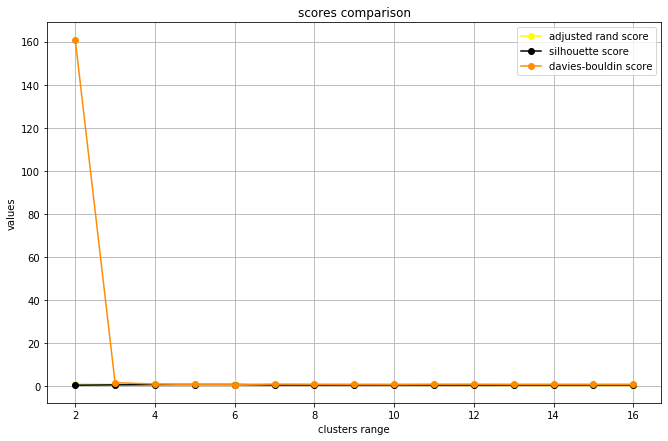

In [734]:
scoresAnalyzer(X, y, 'nearest_neighbors', eigen_solver='arpack', n_neighbors=10)

For 2 cl,	ARI is 1.0, 	 S_score is 0.2892726, 	 DB_score is 160.9260822
For 3 cl,	ARI is 0.7503993, 	 S_score is 0.4230614, 	 DB_score is 1.4090845
For 4 cl,	ARI is 0.6683796, 	 S_score is 0.538205, 	 DB_score is 0.8497133
For 5 cl,	ARI is 0.6241324, 	 S_score is 0.5970597, 	 DB_score is 0.6222064
For 6 cl,	ARI is 0.6020219, 	 S_score is 0.6077042, 	 DB_score is 0.5983977
For 7 cl,	ARI is 0.3511227, 	 S_score is 0.3650238, 	 DB_score is 0.8197833
For 8 cl,	ARI is 0.2787155, 	 S_score is 0.3905547, 	 DB_score is 0.7296075
For 9 cl,	ARI is 0.2630385, 	 S_score is 0.4018692, 	 DB_score is 0.699661
For 10 cl,	ARI is 0.249258, 	 S_score is 0.4031537, 	 DB_score is 0.6882299
For 11 cl,	ARI is 0.2017359, 	 S_score is 0.3513783, 	 DB_score is 0.7449018
For 12 cl,	ARI is 0.1919891, 	 S_score is 0.3488618, 	 DB_score is 0.742903
For 13 cl,	ARI is 0.1659798, 	 S_score is 0.3809472, 	 DB_score is 0.7079054
For 14 cl,	ARI is 0.1589984, 	 S_score is 0.3830664, 	 DB_score is 0.6988741
For 15 cl,	ARI 

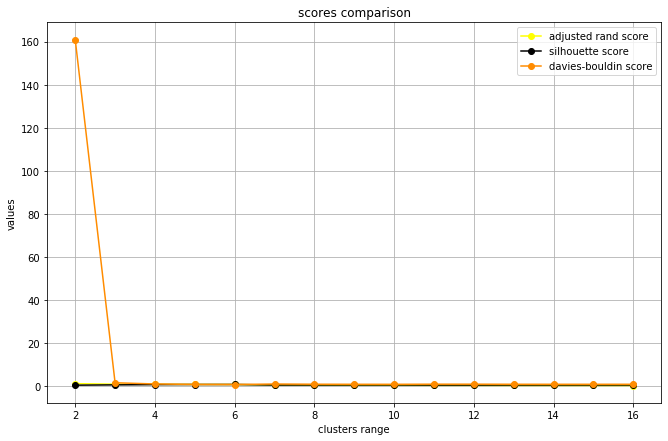

In [735]:
scoresAnalyzer(X, y, 'nearest_neighbors', eigen_solver='lobpcg', n_neighbors=8)

For 2 cl,	ARI is 0.044938, 	 S_score is 0.267288, 	 DB_score is 1.4248515
For 3 cl,	ARI is 0.2613416, 	 S_score is 0.4276596, 	 DB_score is 0.9792274
For 4 cl,	ARI is 0.3637202, 	 S_score is 0.483279, 	 DB_score is 0.772886
For 5 cl,	ARI is 0.4315095, 	 S_score is 0.5138357, 	 DB_score is 0.645781
For 6 cl,	ARI is 0.5994687, 	 S_score is 0.6141914, 	 DB_score is 0.5913415
For 7 cl,	ARI is 0.5824629, 	 S_score is 0.6189705, 	 DB_score is 0.5688283
For 8 cl,	ARI is 0.570595, 	 S_score is 0.6208993, 	 DB_score is 0.5611855
For 9 cl,	ARI is 0.3143701, 	 S_score is 0.3875023, 	 DB_score is 0.7330582
For 10 cl,	ARI is 0.2326867, 	 S_score is 0.4107287, 	 DB_score is 0.6844149
For 11 cl,	ARI is 0.2312555, 	 S_score is 0.233643, 	 DB_score is 0.6958899
For 12 cl,	ARI is 0.2297923, 	 S_score is 0.2232768, 	 DB_score is 0.7204461
For 13 cl,	ARI is 0.2313192, 	 S_score is 0.2058601, 	 DB_score is 0.7098813
For 14 cl,	ARI is 0.2280709, 	 S_score is 0.1958058, 	 DB_score is 0.7376936
For 15 cl,	ARI

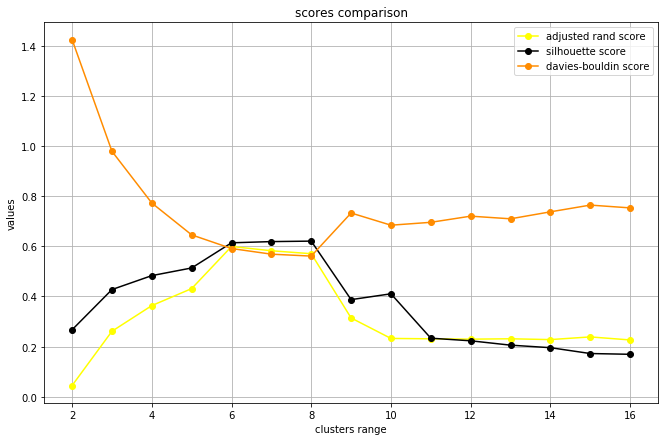

In [736]:
scoresAnalyzer(X, y, 'polynomial', eigen_solver='arpack')

For 2 cl,	ARI is 0.0044336, 	 S_score is 0.2250034, 	 DB_score is 1.4941855
For 3 cl,	ARI is 0.279496, 	 S_score is 0.4251959, 	 DB_score is 1.0034786
For 4 cl,	ARI is 0.3637202, 	 S_score is 0.483279, 	 DB_score is 0.772886
For 5 cl,	ARI is 0.4315095, 	 S_score is 0.5138357, 	 DB_score is 0.645781
For 6 cl,	ARI is 0.5996293, 	 S_score is 0.6144301, 	 DB_score is 0.5950968
For 7 cl,	ARI is 0.5824629, 	 S_score is 0.6189705, 	 DB_score is 0.5688283
For 8 cl,	ARI is 0.5713819, 	 S_score is 0.6207805, 	 DB_score is 0.5610897
For 9 cl,	ARI is 0.3144022, 	 S_score is 0.3876808, 	 DB_score is 0.733392
For 10 cl,	ARI is 0.232349, 	 S_score is 0.4123085, 	 DB_score is 0.6830599
For 11 cl,	ARI is 0.2308373, 	 S_score is 0.2334356, 	 DB_score is 0.6955431
For 12 cl,	ARI is 0.2296955, 	 S_score is 0.2242844, 	 DB_score is 0.7081038
For 13 cl,	ARI is 0.2286019, 	 S_score is 0.2078059, 	 DB_score is 0.7262091
For 14 cl,	ARI is 0.2268972, 	 S_score is 0.1962872, 	 DB_score is 0.7480294
For 15 cl,	AR

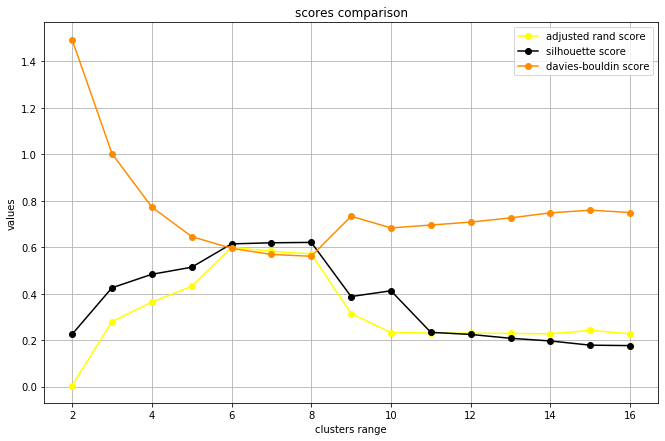

In [737]:
scoresAnalyzer(X, y, 'poly', eigen_solver='arpack')

For 2 cl,	ARI is 0.1621333, 	 S_score is 0.4216183, 	 DB_score is 1.1548627
For 3 cl,	ARI is 0.3020211, 	 S_score is 0.4603272, 	 DB_score is 0.920708
For 4 cl,	ARI is 0.6658432, 	 S_score is 0.5428348, 	 DB_score is 0.7950734
For 5 cl,	ARI is 0.6194661, 	 S_score is 0.597067, 	 DB_score is 0.6332941
For 6 cl,	ARI is 0.5946257, 	 S_score is 0.6143269, 	 DB_score is 0.5916325
For 7 cl,	ARI is 0.5731301, 	 S_score is 0.6168705, 	 DB_score is 0.5652557
For 8 cl,	ARI is 0.5662498, 	 S_score is 0.6199942, 	 DB_score is 0.5550301
For 9 cl,	ARI is 0.5626453, 	 S_score is 0.6013369, 	 DB_score is 0.589363
For 10 cl,	ARI is 0.5520365, 	 S_score is 0.59932, 	 DB_score is 0.592162
For 11 cl,	ARI is 0.2888196, 	 S_score is 0.3763763, 	 DB_score is 0.7141964
For 12 cl,	ARI is 0.2800212, 	 S_score is 0.3742256, 	 DB_score is 0.6977689
For 13 cl,	ARI is 0.2908585, 	 S_score is 0.3497124, 	 DB_score is 0.7432316
For 14 cl,	ARI is 0.2820981, 	 S_score is 0.3694833, 	 DB_score is 0.7115824
For 15 cl,	AR

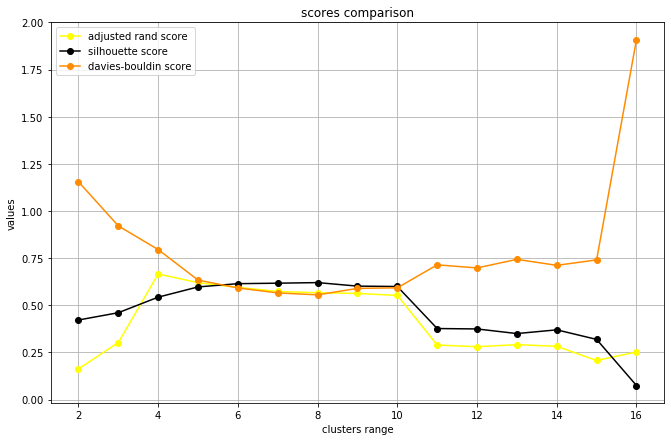

In [738]:
scoresAnalyzer(X, y, 'rbf', eigen_solver='arpack')

For 2 cl,	ARI is 0.1889731, 	 S_score is 0.4194402, 	 DB_score is 1.2281593
For 3 cl,	ARI is 0.2833756, 	 S_score is 0.4610789, 	 DB_score is 0.9001083
For 4 cl,	ARI is 0.6658111, 	 S_score is 0.5423921, 	 DB_score is 0.7983297
For 5 cl,	ARI is 0.6240682, 	 S_score is 0.5970581, 	 DB_score is 0.627038
For 6 cl,	ARI is 0.5949629, 	 S_score is 0.6134994, 	 DB_score is 0.5941614
For 7 cl,	ARI is 0.573114, 	 S_score is 0.6167443, 	 DB_score is 0.5648833
For 8 cl,	ARI is 0.5686105, 	 S_score is 0.6098082, 	 DB_score is 0.5715163
For 9 cl,	ARI is 0.3205693, 	 S_score is 0.4046606, 	 DB_score is 0.7150803
For 10 cl,	ARI is 0.3121133, 	 S_score is 0.386756, 	 DB_score is 0.7261215
For 11 cl,	ARI is 0.3017928, 	 S_score is 0.3639215, 	 DB_score is 0.7520375
For 12 cl,	ARI is 0.29421, 	 S_score is 0.3711474, 	 DB_score is 0.7290943
For 13 cl,	ARI is 0.294472, 	 S_score is 0.3766324, 	 DB_score is 0.7316073
For 14 cl,	ARI is 0.2920717, 	 S_score is 0.3913021, 	 DB_score is 0.6994741
For 15 cl,	AR

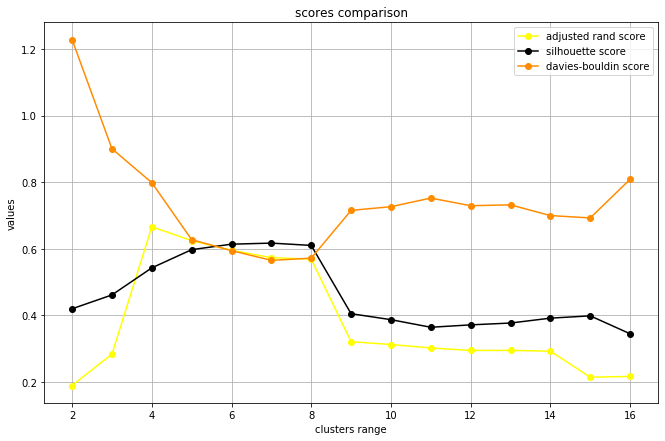

In [739]:
scoresAnalyzer(X, y, 'laplacian', eigen_solver='arpack')

For 2 cl,	ARI is 0.1557413, 	 S_score is 0.4203846, 	 DB_score is 1.1394037
For 3 cl,	ARI is 0.3136427, 	 S_score is 0.4595922, 	 DB_score is 0.9389816
For 4 cl,	ARI is 0.1879366, 	 S_score is 0.4243701, 	 DB_score is 0.6810242
For 5 cl,	ARI is 0.3154252, 	 S_score is 0.4513065, 	 DB_score is 0.6773933
For 6 cl,	ARI is 0.4363548, 	 S_score is 0.3909978, 	 DB_score is 2.5717479
For 7 cl,	ARI is 0.4298808, 	 S_score is 0.4495201, 	 DB_score is 1.3299012
For 8 cl,	ARI is 0.2955452, 	 S_score is 0.183389, 	 DB_score is 2.6987368
For 9 cl,	ARI is 0.1925436, 	 S_score is 0.1392054, 	 DB_score is 2.5849812
For 10 cl,	ARI is 0.2202928, 	 S_score is 0.3031737, 	 DB_score is 0.9921036
For 11 cl,	ARI is 0.2076699, 	 S_score is 0.098258, 	 DB_score is 1.7391272
For 12 cl,	ARI is 0.162595, 	 S_score is -0.0463298, 	 DB_score is 2.1465234
For 13 cl,	ARI is 0.2371365, 	 S_score is 0.0939497, 	 DB_score is 1.9279705
For 14 cl,	ARI is 0.212708, 	 S_score is 0.0781801, 	 DB_score is 1.4509939
For 15 cl,

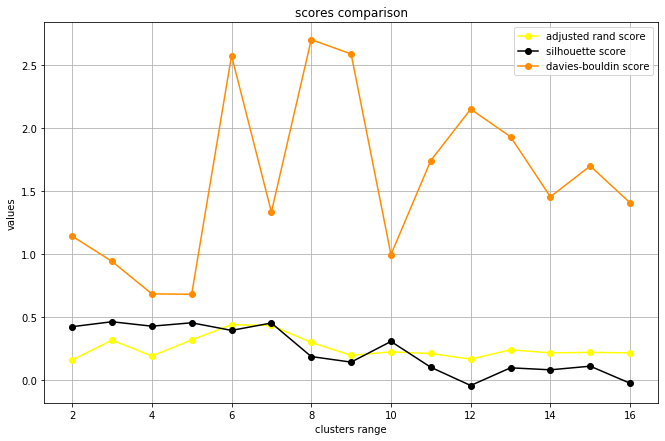

In [740]:
scoresAnalyzer(X, y, 'sigmoid', eigen_solver='amg')

### Візуалізація Silhouette аналізу

For n_clusters = 2 The average silhouette_score is : 0.28927262648473023
For n_clusters = 3 The average silhouette_score is : 0.4227211283719341
For n_clusters = 4 The average silhouette_score is : 0.539364824974611
For n_clusters = 5 The average silhouette_score is : 0.5973759532667521
For n_clusters = 6 The average silhouette_score is : 0.5955543814130522


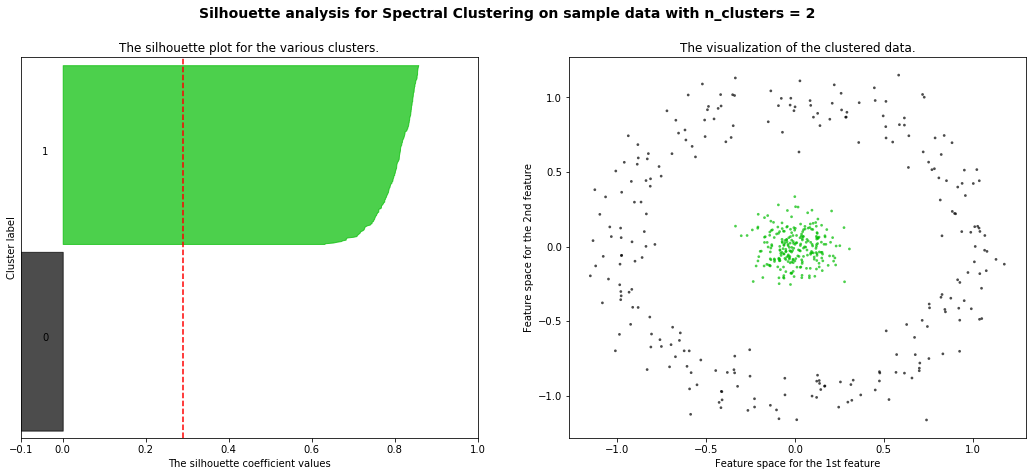

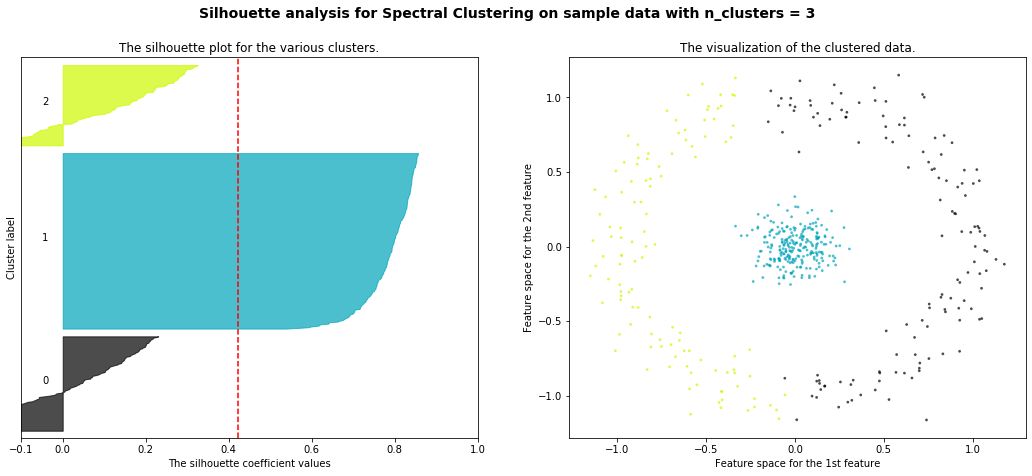

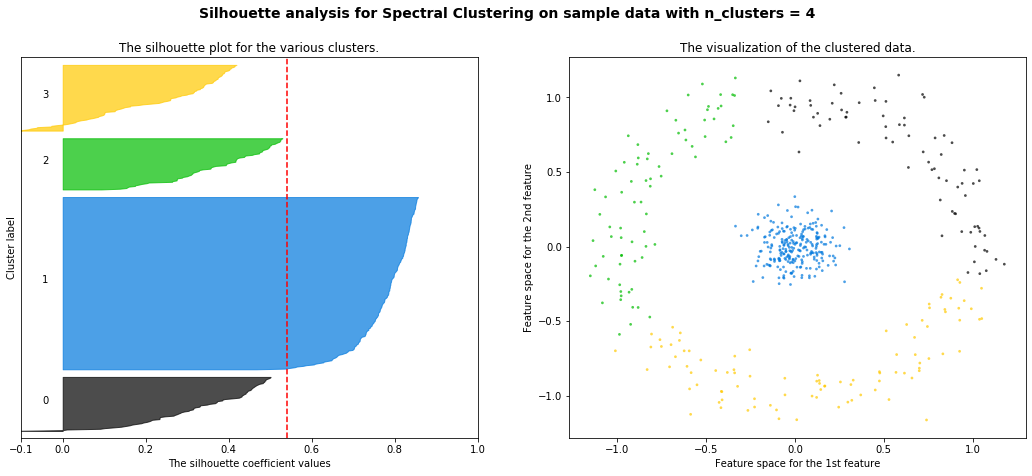

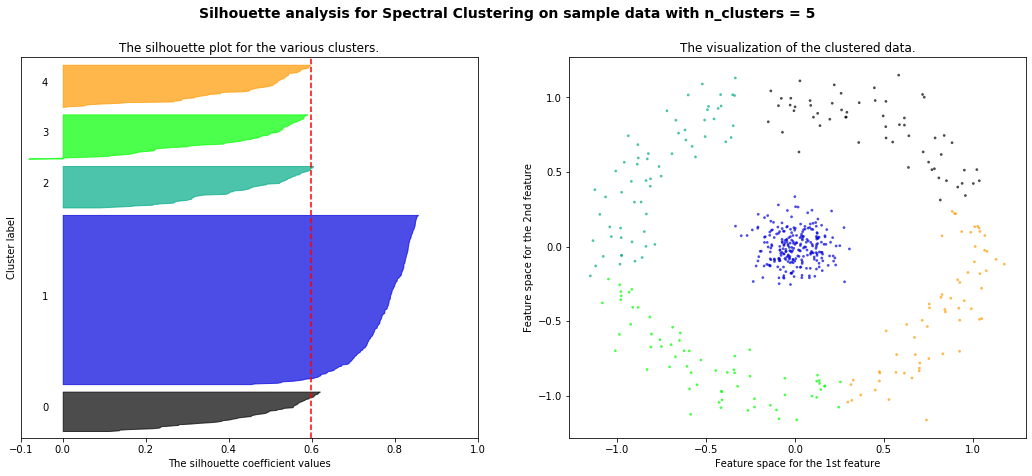

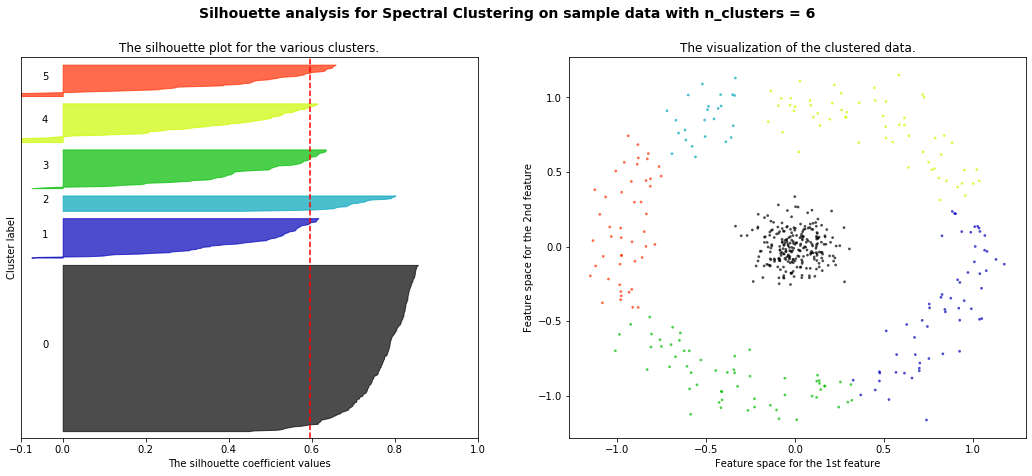

In [741]:
for n_clusters in range(2, 7):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors')
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for Spectral Clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Висновки
Під час виконання роботи було кластеризовано два датасети, а саме digits та circles, за допомогою методу спектральної кластеризації. На першому датасеті спектральна кластеризація працює приблизно однаково для різних параметрів. Після вилучення деяких сумнівних даних результати покращились. Найкращими параметрами виявились: affinity='nearest_neighbors', eigen_solver='lobpcg' та n_neighbors=8.  

Для circles з двома кластерами результат був ідеальним, хоча ядра з pairwise_kernels адекватних результатів не дають. 

Для обох кластеризованих датасетів були обчислені відповідні метрики.